In [1]:
# set-up -- do not change
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
npr.seed(1)

# Question 3.1 (6 pts)

> In this question, we extend the cue combination observer model seen in class with a prior.

We consider here the standard model of cue combination modeling an audio-visual estimation experiment like the one seen in class and represented in Figure 5.1 of \[**MKG23**\]. All values are measured in degrees of visual angle.

- Differently from the cue combination cases we considered before, here we introduce a Gaussian prior, $p(s) = \mathcal{N}\left(s; \mu_s, \sigma_s^2 \right)$.
- For the rest, we assume the usual setup with two conditionally independent Gaussian measurements, $x_i \sim \mathcal{N}\left(x_i | s_i, \sigma_i^2\right)$ for $i = 1,2$ (with audio = 1 and visual = 2).
- As usual, we also postulate that the observer believes that $s_1 = s_2 = s$, so that their posterior is:
$$
p(s|x_1, x_2) \propto p(s) p(x_1|s) p(x_2|s).
$$
- We ignore motor noise (i.e, $r = \hat{s}$, or equivalently $\sigma_\text{motor} = 0$ deg). In other words, the estimate distribution is equivalent to the response distribution $p(\hat{s}|s_1, s_2) = p(r|s_1, s_2)$. *Note*: This is not relevant for part a, but only for part b of this exercise.

Throughout the exercise, we assume the following model parameters:
$$
\mu_s = 1 \text{ deg}, \; \sigma_s = 2 \text{ deg}, \quad \sigma_1 = 2 \text{ deg}, \; \sigma_2 = 3 \text{ deg}.
$$

- a) Compute the observer's posterior distribution $p(s|x_1,x_2)$ for $x_1 = 3, x_2 = -1$ deg. Report the posterior mean $\mu_\text{post}$ and standard deviation $\sigma_\text{post}$ in Moodle.
- b) Compute the observer's estimate distribution $p(\hat{s}|s_1, s_2)$ for $s_1 = 6, s_2 = 0$ deg, assuming they use the posterior mean estimate $\hat{s}_\text{PM} = \mu_\text{post}$ (as per the model described above). Report the estimate distribution mean $\mu_\text{est}$ and standard deviation $\sigma_\text{est}$ in Moodle.

*Hints*: 
- Be careful that in this case (non-flat prior), the variance of the estimate distribution $\sigma_\text{est}^2$ is *not* equal to the posterior variance $\sigma_\text{post}^2$.
- For this exercise, it might be convenient to use the precision representation from the book, using $J = \frac{1}{\sigma^2}$.
- You are asked to get to the results analytically, thus report your solutions up to numerical precision. For exercise (b), simulation results within $\pm 0.01$ from the correct solution will be accepted, but will only give half points. Numerical integration will not work for part (b).

a):
In order to finds the the posterior mean $\mu_\text{post}$ and standard deviation $\sigma_\text{post}$ we can do the steps as follows:

$$
{Prior:}
p(s) = N(s; \mu_s, \sigma_s^2)
$$

$${Likelihoods:}
p(x_1 | s) = N(x_1 | s, \sigma_1^2) \quad \text{and} \quad p(x_2 | s) = N(x_2 | s, \sigma_2^2)
$$

$${Posterior:}
p(s | x_1, x_2) \propto p(s) p(x_1|s) p(x_2|s)
$$

As it said in the question the prior is non-flat. For simplicity we can precision representation.

The weights $w_s$, $w_1$, and $w_2$ are defined as:

- For $w_s$:
$$
w_s = \frac{J_s}{J_s + J_1 + J_2},
$$

- For $w_1$:
$$
w_1 = \frac{J_1}{J_s + J_1 + J_2},
$$

- For $w_2$:
$$
w_2 = \frac{J_2}{J_s + J_1 + J_2},
$$

where $J_s = \frac{1}{\sigma_s^2}$, $J_1 = \frac{1}{\sigma_1^2}$ and  $J_2 = \frac{1}{\sigma_2^2}$.

So the posterior mean can be expressed as a linear combination of the prior mean and the sensory measurements.

$$
\mu_{\text{post}} = w_s \mu_s + w_1x_1 + w_2x_2
$$

The total precision of the posterior $J_{\text{post}}$ is given by:

$$
J_{\text{post}} = J_s + J_1 + J_2
$$


So the posterior variance is:
$$
\sigma_{\text{post}}^2 = \frac{1}{J_{\text{post}}}
$$

And we can derive the posterior Standard Deviation $\sigma_{\text{post}}$** as:

$$
\sigma_{\text{post}} = \sqrt{\sigma_{\text{post}}^2} = \frac{1}{\sqrt{J_{\text{post}}}}
$$


In [2]:
# Given values
mu_s = 1 
sigma_s = 2 
sigma1 = 2  # Standard deviation of the first cue (audio)
sigma2 = 3  # Standard deviation of the second cue (visual)
x1 = 3 
x2 = -1  

# Precisions
J_s = 1 / sigma_s**2
J_1 = 1 / sigma1**2
J_2 = 1 / sigma2**2
J_total = J_s + J_1 + J_2

# Weights
w_s = J_s / J_total
w_1 = J_1 / J_total
w_2 = J_2 / J_total

# Posterior mean 
mu_post = w_s * mu_s + w_1 * x1 + w_2 * x2

# Posterior standard deviation
sigma_post = (1 / J_total)**0.5

print('The posterior mean value is : {}'.format(mu_post))
print('The posterior standard deviation value is : {}'.format(sigma_post))


The posterior mean value is : 1.4545454545454544
The posterior standard deviation value is : 1.2792042981336627


b):
In order to find the mean and the standard deviation for estimation destribution, we can use this fact that $\hat{s}$ is a linear function of $x_1$ and $x_2$, and $x_1$ and $x_2$ are (indepedent) Gaussian random variables, so $\hat{s}$ is Gaussian as well with mean and variance:


$$\mathbb{E}\left[\hat{s} | s_1, s_2\right] = \mathbb{E}\left[w_s \mu_{\text{post}} + w_1 x_1 + w_2 x_2 | s_1, s_2\right] \\
= w_s \mu_{\text{post}} + w_1 \mathbb{E}\left[x_1 | s_1, s_2\right] + w_2 \mathbb{E}\left[x_2 | s_1, s_2\right] \\
= w_s \mu_{\text{post}} + w_1 s_1 + w_2 s_2$$



$$
\text{Var}\left[\hat{s} | s_1, s_2\right] = \text{Var}\left[w_s \mu_{\text{post}} + w_1 x_1 + w_2 x_2 | s_1, s_2\right] \\
= w_s^2 \text{Var}\left[\mu_{\text{post}}\right] + w_1^2 \text{Var}\left[x_1 | s_1, s_2\right] + w_2^2 \text{Var}\left[x_2 | s_1, s_2\right] \\
= 0 + w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 \\
= w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2
$$

According to the definition of variance, the variance of $\mu_{\text{post}}$ is zero since it is a scalar.


In [3]:
s1 = 6
s2 = 0

#  estimate distribution mean
mu_est= w_s * mu_s + w_1 * s1 + w_2 * s2

# estimate distribution standard deviation
sigma_est = np.sqrt(w_1**2 * sigma1**2 + w_2**2 * sigma2**2)

print('The estimated distribution mean is : {}'.format(mu_est))
print('The estimated distribution standard deviation is : {}'.format(sigma_est))

The estimated distribution mean is : 2.8636363636363633
The estimated distribution standard deviation is : 0.9833321660356333


# Question 3.2 (6 pts)

> In this problem, we can now use our knowledge to fit data from a real audio-visual cue combination experiment!

The data have been preprocessed for the purpose of this exercise. We use here the `simplecue` model, defined below:

- We assume an observer with a flat prior $p(s) = 1$ (i.e., "no prior").
- The measurement noise for the auditory stimulus is $p(x_1|s_1) = \mathcal{N}(x_1|s_1, \sigma_{1}^2)$, as usual. 
- In this experiment, there are *two* possible levels for the visual noise, *low* noise (`0`) and *high* noise (`1`). Experimentally, the visual stimulus is made "noisier" in a trial by blurring and/or reducing the contrast the stimulus. So, the measurement noise for the visual stimulus depends on the visual noise level in the trial, such that
  $$\mathcal{N}(x_2|s_2, \sigma_{2,\text{low}}^2) \text{ if noise_level is 0,} \qquad \text{and} \qquad
  \mathcal{N}(x_2|s_2, \sigma_{2,\text{high}}^2) \text{ if noise_level is 1}.
  $$
- We assume that the observer is aware of the noise level in each trial.
- As usual in simple cue combination, the observer believes that $s_1 = s_2 = s$.
- The observer reports the posterior mean estimate $\hat{s}_\text{PM}$. We assume zero motor noise ($r = \hat{s}$ and $\sigma_\text{motor} = 0$).
- The model parameters are thus $\theta = \left(\sigma_1, \sigma_{2,\text{low}}, \sigma_{2,\text{high}} \right)$.

We analyze a dataset of audiovisual estimation data from a single subject.
The dataset consists of a table with four columns, where each row represents a trial of the experiment. The four columns are:
- The location of the auditory stimulus `s1` (in deg).
- The location of the visual stimulus `s2` (in deg).
- The noise level of the visual stimulus `noise_level`, here `0` (low noise) or `1` (high noise). 
- The observer's response `r` (in deg).

---------------------------------

- a) As a sanity check, compute the log-likelihood of the full dataset for model parameters $\theta_0 = (\sigma_1 = 4, \sigma_{2,\text{low}} = 6, \sigma_{2,\text{high}} = 8)$ and report the result in Moodle.
- b) Fit the model above to the data using maximum-likelihood esimation (MLE). Report in Moodle the log-likelihood at the MLE solution.

*Hint*:
- In part (a), you should find that $-2050 < \log \mathcal{L}(\theta_0) < -2000$.

In [4]:
# Load data of audiovisual cue combination experiment from .csv file
df = pd.read_csv('https://raw.githubusercontent.com/lacerbi/prob-cog-mod-files/main/data/avcue_data.csv')
df = df.to_numpy()
s1 = df[:,0]
s2 = df[:,1]
noise_level = df[:,2].astype(int)
r = df[:,3]

a):
According to the information in the question, the auditory and visual stimuli are assumed to be perceived with Gaussian noise, represented by:

- For the auditory stimulus:
$$
p(x_1 | s_1) = N(x_1 | s_1, \sigma_1^2)
$$
where $\sigma_1^2$ is the variance of the auditory noise.

- For the visual stimulus:
$$
p(x_2 | s_2) = N(x_2 | s_2, \sigma_2^2)
$$
where $\sigma_2^2$ is the variance of the visual noise.

The posterior mean estimate $\hat{s}_{\text{PM}}$ combines the information from both the auditory and visual cues. Assuming a flat prior ($p(s) = 1$), the posterior mean is a weighted average of the cues, where the weights are proportional to their precisions:

$$
\hat{s}_{\text{PM}} = \frac{J_1 s_1 + J_2 s_2}{J_1 + J_2}
$$

The log-likelihood of an observer's response $r$ given the model parameters is based on the Gaussian probability density function. The variance in the observer's response is effectively the inverse of the total precision from both cues:

$$
\text{variance} = \frac{1}{J_1 + J_2}
$$

Finally, the log-likelihood for a single observation is given by:

$$
-\frac{1}{2} \log(2\pi \times \text{variance}) - \frac{1}{2} \frac{(r - \hat{s}_{\text{PM}})^2}{\text{variance}}
$$

where $\hat{s}_{\text{PM}}$ is the posterior mean estimate.



In [5]:
# Model parameters 
sigma1 = 4  
sigma2_low = 6  
sigma2_high = 8  

J1 = 1 / sigma1**2 
J2_low = 1 / sigma2_low**2
J2_high = 1 / sigma2_high**2

def posterior_mean(s1, s2, J1, J2):
    weighted_sum = J1 * s1 + J2 * s2
    total = J1 + J2
    return weighted_sum / total


def log_likelihood(s1, s2, r, noise_level, J1, J2_low, J2_high):
    J2 = J2_low if noise_level == 0 else J2_high
    s_hat = posterior_mean(s1, s2, J1, J2)
    total= J1 + J2
    variance = 1 / total  
    return -0.5 * np.log(2 * np.pi * variance) - 0.5 * ((r - s_hat)**2 / variance)

# Compute the log-likelihood for each trial and sum them up
total_log_likelihood = np.sum([log_likelihood(s1[i], s2[i], r[i], noise_level[i], J1, J2_low, J2_high) for i in range(len(s1))])

print("Total log-likelihood of the dataset using precision:", total_log_likelihood)

Total log-likelihood of the dataset using precision: -2034.6551809030655


In [6]:
def total_log_likelihood(params, s1, s2, r, noise_level):
    sigma1, sigma2_low, sigma2_high = params
    J1 = 1 / sigma1**2
    J2_low = 1 / sigma2_low**2
    J2_high = 1 / sigma2_high**2
    
    log_likelihood_sum = 0
    for i in range(len(s1)):
        log_likelihood_sum += log_likelihood(s1[i], s2[i], r[i], noise_level[i], J1, J2_low, J2_high)
    return log_likelihood_sum

# Define the function to minimize 
def neg_total_log_likelihood(params):
    return -total_log_likelihood(params, s1, s2, r, noise_level)

use_pybads = True
initial_params = [4, 6, 8]  

if use_pybads:
    from pybads.bads import BADS
    
    plausible_lower_bounds = [0.1, 0.1, 0.1]  
    plausible_upper_bounds = [20, 20, 20]  
    
    optimizer = BADS(neg_total_log_likelihood, initial_params, 
                     lower_bounds=plausible_lower_bounds,
                     upper_bounds=plausible_upper_bounds)
    result = sp.optimize.minimize(neg_total_log_likelihood, initial_params, method='L-BFGS-B', bounds=[(0.1, None), (0.1, None), (0.1, None)])
    mle_params = result.x

    print("MLE Parameters: sigma1 = {}, sigma2_low = {}, sigma2_high = {}".format(mle_params[0], mle_params[1], mle_params[2]))

    mle_log_likelihood = total_log_likelihood(mle_params, s1, s2, r, noise_level)
    print("Log-likelihood at MLE solution is : {}".format(mle_log_likelihood))


bads:TooCloseBounds: For each variable, hard and plausible bounds should not be too close. Moving plausible bounds.
Variables (index) internally transformed to log coordinates: [[0 0]
 [0 1]
 [0 2]]
MLE Parameters: sigma1 = 9.231196983173485, sigma2_low = 4.63302604731058, sigma2_high = 6.78174305495014
Log-likelihood at MLE solution is : -1604.1495487423465


# Question 3.3 (6 pts)

> In this question, we consider learning the probability of a binary event through noisy measurements. A similar task is used in behavioral tasks with humans and animals to explore the nature of decision making (see notes).

We consider here the following decision-making task:

- In each trial of the task, the observer needs to press an arrow key depending on whether they are shown a left-tilted or a right-tilted grating on a screen.
- In each trial $i$, the grating orientation $s_i$ is either -1 (left) or 1 (right), with $p(s_i = 1|\pi_\text{R}) = \pi_\text{R}$ and $p(s_i = -1|\pi_\text{R}) = 1 - \pi_\text{R}$, where $\pi_\text{R} \in (0, 1)$ is the probability of the grating being right-tilted.
- The observer only sees a noisy measurement of orientation $x_i$, with $p(x_i|s_i) = \mathcal{N}\left(x_i|s_i,\sigma^2\right)$. In this exercise, we assume $\sigma = 1$.
- Assume the observer starts with a flat prior over $\pi_\text{R}$, that is $p(\pi_\text{R}) = 1$ for $\pi_\text{R} \in (0, 1)$.

Compute numerically the posterior $p(\pi_\text{R}|\textbf{x}_\text{obs})$ that the Bayesian observer would have after having observed the full sequence of noisy measurements $\textbf{x}_\text{obs} = \left(x_1, \ldots, x_T\right)$ provided below (assuming no feedback is given to the subject). Report in Moodle the mean and standard deviation of the posterior over $\pi_\text{R}$ at the end of the last trial $T$.


*Hint*: Given the posterior $ p(\pi_\text{R}| x_1,\ldots, x_{t-1})$ at the end of the previous trial $t-1$ (where $t = 0$ is the prior), you can compute the posterior at trial $t$ as
$$
p(\pi_\text{R} | x_1, \ldots, x_t) \propto p(\pi_\text{R}| x_1,\ldots, x_{t-1}) \left[ p(x_{t}| s_t = 1) p(s_{t} = 1|\pi_\text{R}) + p(x_{t}| s_t = -1) p(s_{t} = -1|\pi_\text{R})\right],
$$
where all the terms are defined above.

*Notes*: 
- A similar task is being used with mice by the [International Brain Laboratory](https://www.internationalbrainlab.com/#home) to explore the nature of decision making (see [this paper](https://elifesciences.org/articles/63711)). The experiments show that, after training, mice adapt their responses according to changes of $\pi_\text{R}$ across experimental blocks. A key question is how the probability $\pi_\text{R}$ is represented in the mouse brain (if explicitly represented at all).
- Of course, when analyzing actual experimental data we would not have access to $\mathbf{x}_\text{obs}$, and we would need to marginalize over it given the (known to us) sequence of stimuli, but this is not required here.

In [7]:
x_obs = np.array([ 0.82757179,  0.12214158,  1.04221375,  1.58281521, -0.10061918,
        2.14472371,  1.90159072,  1.50249434,  1.90085595,  0.31627214,
        0.87710977,  0.06423057,  0.73211192, -0.46964453,  0.30833925,
        0.60324647,  0.3128273 ,  0.15479436,  0.32875387,  0.9873354 ,
       -2.11731035, -0.7655843 ,  2.65980218,  1.74204416, -1.19183555,
       -1.88762896,  0.25284171,  2.6924546 ,  1.05080775, -1.63699565])

In [8]:
pi_R = np.linspace(0, 1, 1000)
prior = np.ones_like(pi_R)  # Flat prior

# Update function for the posterior
def update_posterior(prior, x, pi_R):
    likelihood_right = sps.norm.pdf(x, 1, 1)  # p(x|s=1)
    likelihood_left = sps.norm.pdf(x, -1, 1)  # p(x|s=-1)
    posterior = prior * (likelihood_right * pi_R + likelihood_left * (1 - pi_R)) 
    return posterior / np.sum(posterior)  # Normalize

# Update the posterior distribution iteratively for each observation in x_obs
posterior = prior
for x in x_obs:
    posterior = update_posterior(posterior, x, pi_R)

# Compute mean and standard deviation of the posterior distribution
mean_pi_R = np.sum(posterior * pi_R)
std_pi_R = np.sqrt(np.sum(posterior * (pi_R - mean_pi_R)**2))

print('The posterior mean is : {}'.format(mean_pi_R))
print('The posterior standard deviation is : {}'.format(std_pi_R))

The posterior mean is : 0.7665069446447835
The posterior standard deviation is : 0.09999268626235762


As you can see, the mean of the posterior over $\pi_R$ is 0.767 and the standard deviation is 0.099 which means based on the observed data, the bayesian observer estimates that there is a roughly 76.7% chance that the grating is right-tilted, with a standard deviation of 9.99% reflecting the uncertainty in this estimate.

# Question 3.4 (7 pts)

> In this question, we examine how subjects might learn a Gaussian prior over stimuli, which is a common occurrence in many psychophysical experiments.

We assume that the observer is simultaneously learning both the mean $\mu_s$ and the standard deviation $\sigma_s$ of the prior. We denote with $q_s(s)$ the observer's prior (as opposed to the true experimental distribution of stimuli, $p_s(s)$).

For example, we could consider the "coin catching" task of \[**BVK10**\] described in Week 6 and Exercise 6.2, but the details do not particularly matter. What matters is that in each trial the observer sees stimulus $s \sim p(s) = \mathcal{N}\left(s| \mu_s, \sigma_s^2\right)$ (we ignore measurement noise). We assume the observer learns the parameters of the distribution $p_s(s)$ over multiple trials.

Assume that the observer starts with a factorized prior over $\mu_s$ and $\sigma_s$:
$$
p(\mu_s, \sigma_s) = p(\mu_s) p(\sigma_s) = \mathcal{N}\left(\mu_s; 0, \tau^2 \right) \frac{1}{\tau} \exp\left[-\frac{\sigma_s}{\tau} \right] \qquad \text{ for } \; \sigma_s > 0,
$$
where $\tau = 0.1$.

Take the sequence of stimuli $\textbf{s}$ computed below. Compute the posterior $p(\mu_s, \sigma_s| s_1, \ldots, s_t)$, with the simplifying assumption that the observer has direct access to $s_i$ at the end of each trial. Compute the posterior mean of the observer's prior mean $\hat{\mu_s}_{PM}$ and the posterior mean of the observer's prior standard deviation $\hat{\sigma_s}_{PM}$ as a function of trial $t$, where $t = 0$ is before the start of the experiment (prior), $t = 1$ is the end of the first trial, and so on up to $t = T$.

- a) Report in Moodle the posterior means of the observer's prior parameters, $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$, after the $T$ observations.
- b) Plot the posterior mean $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$ as a function of $t = 0, \ldots, T$. You should see that that $\hat{\mu_s}_\text{PM}$ increases with time, while $\hat{\sigma_s}_\text{PM}$ has an initial spike upwards, and then decreases over time. Can you explain why? Write your answer below and report it in Moodle (max 200 words).

*Hints*:
- For part (a), you will need a 2-D grid to keep track of the posterior over $\mu_s$ and $\sigma_s$ across iterations.
- Since $\sigma_s > 0$, start the grid for $\sigma_s$ at a small nonzero value (e.g., `1e-8`).
- Remember that $p(\mu_s | s_1, \ldots, s_t) = \int p(\mu_s, \sigma_s | s_1, \ldots, s_t) d \sigma_s$, and similarly $p(\sigma_s | s_1, \ldots, s_t) = \int p(\mu_s, \sigma_s | s_1, \ldots, s_t) d \mu_s$. These equations will be useful to compute the posterior mean of $\mu_s$ and $\sigma_s$.
- For part (b), first of all look at the distribution of stimuli (i.e., mean and standard deviation of $\mathbf{s}$). How does the distribution of stimuli relate to the prior? What happens over time as more stimuli are seen?

In [9]:
s_t = np.array([ 0.4936518 ,  0.15823654,  0.17077424,  0.08905471,  0.37981114,
       -0.0952308 ,  0.51172176,  0.13581896,  0.29785586,  0.21259444,
        0.46931619, -0.05902111,  0.20163742,  0.19239185,  0.42006542,
        0.08501631,  0.22413577,  0.11832124,  0.25633206,  0.33742228,
        0.08490712,  0.42170856,  0.38523861,  0.32537415,  0.38512839,
        0.14744082,  0.23156647,  0.10963458,  0.20981679,  0.32955332,
        0.14625089,  0.19048697,  0.14692409,  0.12321915,  0.14931308,
        0.24810031,  0.08240345,  0.28516235,  0.49897033,  0.36130662,
        0.22122467,  0.11685566,  0.13792626,  0.50386819,  0.25762116,
        0.15445065,  0.27863732,  0.56503827,  0.26802384,  0.34258047,
        0.29502555,  0.19716252,  0.07862227,  0.19759859,  0.21866586,
        0.33799348,  0.37584751,  0.38966531,  0.2928381 ,  0.38277117,
        0.13684031,  0.43793022,  0.32693947,  0.20528607,  0.32327772,
        0.23866424,  0.41974441,  0.47797252,  0.57783631,  0.04052555,
        0.03338293,  0.17433012,  0.27400556,  0.38142534,  0.29734524,
       -0.05333018,  0.2040694 ,  0.3741962 ,  0.28451421,  0.36430168,
        0.21665078,  0.21988629,  0.27798421,  0.31150775,  0.27974496,
        0.2678513 ,  0.14940066,  0.30663457,  0.26827319,  0.41942259,
        0.42983768,  0.27777346,  0.19370726,  0.15419044,  0.31352415,
        0.26160101,  0.19842195,  0.25653953,  0.15699987,  0.35470481])

T = s_t.shape[0]

In [10]:
# Prior parameters
tau = 0.1

# Adjust discretization of mu_s and sigma_s
mu_s_values = np.linspace(-1, 1, 2**6 + 1)
sigma_s_values = np.linspace(1e-8, 1, 2**6 + 1)

# Create a meshgrid for mu_s and sigma_s
mu_s_grid, sigma_s_grid = np.meshgrid(mu_s_values, sigma_s_values, indexing='ij')

# Initialize the posterior as the prior
posterior = sps.norm.pdf(mu_s_grid, loc=0, scale=tau) * (1/tau) * np.exp(-sigma_s_grid/tau)

# Lists to store the posterior means
mu_s_PM_list = []
sigma_s_PM_list = []

# Update the posterior based on observations and compute posterior means iteratively
for s in s_t:
    likelihood = sps.norm.pdf(s, loc=mu_s_grid, scale=sigma_s_grid)
    posterior *= likelihood
    posterior /= sp.integrate.romb(sp.integrate.romb(posterior, dx=np.diff(sigma_s_values)[0]), dx=np.diff(mu_s_values)[0])  # Normalize

    # Compute and store the posterior means after each observation
    mu_s_PM_num = sp.integrate.romb(sp.integrate.romb(mu_s_grid * posterior, dx=np.diff(sigma_s_values)[0]), dx=np.diff(mu_s_values)[0])
    mu_s_PM = mu_s_PM_num / sp.integrate.romb(sp.integrate.romb(posterior, dx=np.diff(sigma_s_values)[0]), dx=np.diff(mu_s_values)[0])

    sigma_s_PM_num = sp.integrate.romb(sp.integrate.romb(sigma_s_grid * posterior, dx=np.diff(mu_s_values)[0]), dx=np.diff(sigma_s_values)[0])
    sigma_s_PM = sigma_s_PM_num / sp.integrate.romb(sp.integrate.romb(posterior, dx=np.diff(mu_s_values)[0]), dx=np.diff(sigma_s_values)[0])

    mu_s_PM_list.append(mu_s_PM)
    sigma_s_PM_list.append(sigma_s_PM)

# Posterior mean of the observer's prior mean after T observations
mu_s_PM = mu_s_PM_list[-1]

# Posterior mean of the observer's prior standard deviation after T observations
sigma_s_PM = sigma_s_PM_list[-1]

print("The posterior mean of the observer's prior mean is {}".format(mu_s_PM))
print("The posterior mean of the observer's prior standard deviation is {}".format(sigma_s_PM))

The posterior mean of the observer's prior mean is 0.2557116929623856
The posterior mean of the observer's prior standard deviation is 0.13660216418794532


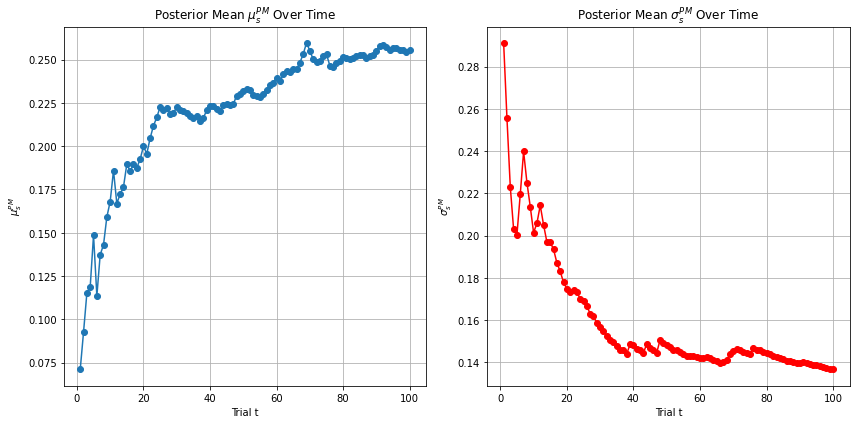

In [11]:
plt.figure(figsize=(12, 6))

# Plot mu_s_PM
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mu_s_PM_list) + 1), mu_s_PM_list, marker='o', linestyle='-')
plt.title(r'Posterior Mean $\mu_s^{PM}$ Over Time')
plt.xlabel('Trial t')
plt.ylabel(r'$\mu_s^{PM}$')
plt.grid(True)

# Plot sigma_s_PM
plt.subplot(1, 2, 2)
plt.plot(range(1, len(sigma_s_PM_list) + 1), sigma_s_PM_list, marker='o', linestyle='-', color='red')
plt.title(r'Posterior Mean $\sigma_s^{PM}$ Over Time')
plt.xlabel('Trial t')
plt.ylabel(r'$\sigma_s^{PM}$')
plt.grid(True)

plt.tight_layout()
plt.show()
